In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [10]:
d=load_boston()
X=d.data
y=d.target

In [34]:
class CustomLinearRegression:
    def __init__(self,lr=0.3):
        self.__lr=lr
        self.errors=[]
    def fit(self,X,y):
        self.__mean=X.mean(axis=0)
        self.__std=X.std(axis=0)
        X=(X-self.__mean)/self.__std
        
        self.__X=X
        self.__y=y
        self.coef_=np.random.randn(X.shape[1])
        self.intercept_=np.random.random()
        for k in range(0,20):
            #print("Error",self.error())
            self.gradient_decent()
            self.errors.append(self.error())
        return self.errors
        
    def gradient_decent(self):
        delta_coef,delta_bias=self.gradient()
        self.coef_+=delta_coef
        self.intercept_+=delta_bias
        #print("Coefficient :",self.coef_,"\nIntercept : ",self.intercept_,"\n")
            
    def gradient(self):
        yh=self.hypo(self.__X)
        diff=(yh-self.__y.reshape((-1,1)))
        del_err_coef=(np.dot(diff.T,self.__X)).flatten()/len(yh)
        del_err_inter=(2*diff).mean()
        return (-del_err_coef*self.__lr,-del_err_inter*self.__lr)
    
    def hypo(self,X):
        return ((np.sum(X*self.coef_,axis=1,keepdims=True))+self.intercept_)
    
    def predict(self,X):
        X_mod=(X-self.__mean)/self.__std
        y_hypo=self.hypo(X_mod)
        return y_hypo.flatten()
        
    def error(self):
        yh=self.hypo(self.__X)
        err=((yh-self.__y.reshape((-1,1)))**2).mean()
        return err

In [35]:
model=CustomLinearRegression()
err=model.fit(X,y)

In [36]:
model.predict(X[:10])

array([30.06472113, 24.70496437, 30.64018835, 29.06392312, 28.52468089,
       25.33126141, 23.08946591, 19.87757746, 12.17143685, 19.40348706])

In [37]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [38]:
#InBuilt Linear Regression
model2=LinearRegression()

In [39]:
model2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
model2.predict(X[:10])

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211])

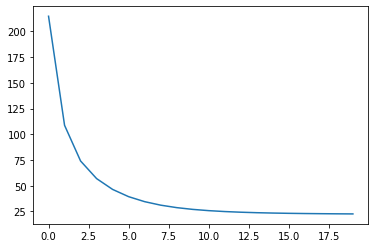

In [41]:
plt.plot(err)